# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('food_claims_2212.csv')
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


## Task 1 - Data Cleaning



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


### **Column - Name - Criteria**

- **claim_id** - Nominal. The unique identifier of the claim. Missing values are not possible due to the database structure.

- **time_to_close** - Discrete. The number of days to close the claim. Any positive value. Replace missing values with the overall median time to close.

- **claim_amount** - Continuous. The initial claim requested in the currency of Brazil, rounded to 2 decimal places.Replace missing values with the overall median claim amount.

- **amount_paid** - Continuous. Final amount paid. In the currency of Brazil. Rounded to 2 decimal places. Replace missing values with the overall median amount paid.

- **location** - Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”. Remove missing values.

- **individuals_on_claim** - Discrete. Number of individuals on this claim. Minimum 1 person. Replace missing value with 0.

- **linked_cases** - Nominal. Whether this claim is linked to other cases. Either TRUE or FALSE. Replace missing values with FALSE.

- **cause** - Nominal. Cause of the food poisoning. One of “vegetable”, “meat” or “unknown”. Replace missing values with ‘unknown’.

We begin the cleaning column by column following criteria show before

#### claim_id



In [4]:
df['claim_id'].drop_duplicates()

0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: claim_id, Length: 2000, dtype: int64

In [5]:
df['claim_id'].isnull().value_counts()

False    2000
Name: claim_id, dtype: int64

The columns claim_id does't have null values.

#### time_to_close

In [6]:
df['time_to_close'].isnull().value_counts()

False    2000
Name: time_to_close, dtype: int64

These columns does´t have null values.

#### claim_amount
Firts we look that the format of this column is showing the curreny initial letter, so we split these to have a integrer a we have the correct data type for this column

In [7]:
df[['denomination', 'claim_amount']] = df['claim_amount'].str.split(expand=True)

After this we transform the data type to a float with two decimals

In [8]:
df['claim_amount'] = df['claim_amount'].astype(float).round(2)

In [9]:
df['claim_amount'].isnull().value_counts()

False    2000
Name: claim_amount, dtype: int64

with all these steps, we have a column free of null values and with a the correct format.

#### amount_paid

Round the values of the column since we have already the correct data type

In [10]:
df['amount_paid'].round(2)

0       51231.37
1       42111.30
2       23986.30
3       27942.72
4       16251.06
          ...   
1995    24265.02
1996     4772.77
1997    10087.81
1998    23310.24
1999     6417.92
Name: amount_paid, Length: 2000, dtype: float64

now we verify the null values in the column

In [11]:
df['amount_paid'].isnull().value_counts()

False    1964
True       36
Name: amount_paid, dtype: int64

so we have null values, we fill these values with the overall amount_paid mean

In [12]:
mean_ap = df['amount_paid'].mean()
df['amount_paid'] = df['amount_paid'].fillna(mean_ap)

#### location

In [13]:
df['location'].unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [14]:
df['location'].isnull().value_counts()

False    2000
Name: location, dtype: int64

in this column we can see a consistenci in the format of the values , and after check the null values, we dont need to perform further manipulation

#### individuals_on_claim

In [15]:
df['individuals_on_claim'].isnull().value_counts()

False    2000
Name: individuals_on_claim, dtype: int64

we have the require format and no null values, no further manipulation is requaried

#### linked_cases

In [16]:
df['linked_cases'].isnull().value_counts()

False    1974
True       26
Name: linked_cases, dtype: int64

In [17]:
df['linked_cases'].unique()

array([False, True, nan], dtype=object)

In [18]:
df['linked_cases'] = df['linked_cases'].replace('nan', False).astype(bool)

#### cause

In [19]:
df['cause'].isnull().value_counts()

False    2000
Name: cause, dtype: int64

In [20]:
df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

we have to replace the format of the values

In [21]:
df['cause'].replace({'Meat': 'meat', 'VEGETABLES': 'vegetable'})

0         unknown
1         unknown
2            meat
3            meat
4       vegetable
          ...    
1995         meat
1996         meat
1997         meat
1998         meat
1999    vegetable
Name: cause, Length: 2000, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
 8   denomination          2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 127.1+ KB


## Task 2

We can perform a value count to visualize 

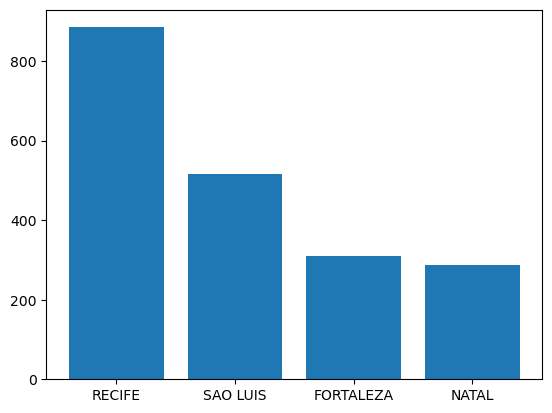

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64


In [23]:
counts = df['location'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()
print(counts)

**We can see that the number of observations for each location is not equal, which means that the observations are not balanced across categories of the variable location.**

## Task 3

Firts  take a look of the central tendenci of the time to close comlumn:

In [24]:
df['time_to_close'].describe()

count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64

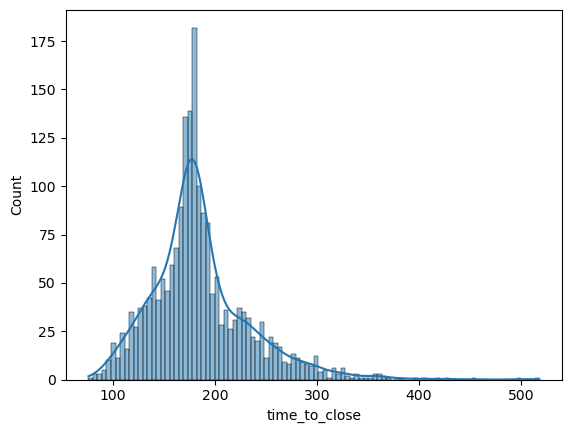

In [25]:
sns.histplot(data=df, x='time_to_close', bins=100, kde=True)
plt.show()

<AxesSubplot:xlabel='time_to_close'>

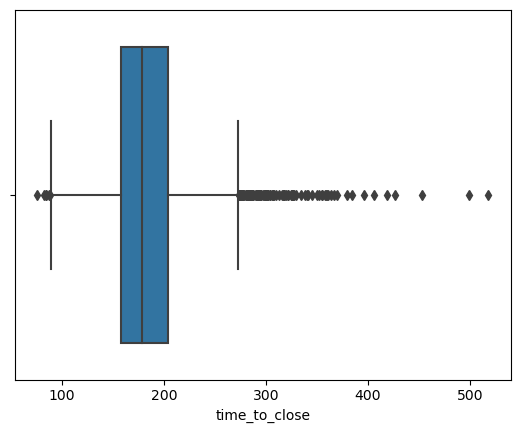

In [26]:
sns.boxplot(data=df, x='time_to_close')

Based on the central tenenci data and our visualizations we can conclute the following:

- Central tendency: The mean (185.568) is higher than the median (179), which indicates that the distribution is slightly right-skewed.

- Spread: The standard deviation (49.16339) is moderately high, which suggests that the data points are somewhat spread out from the mean.

- Range: The minimum value is 76 and the maximum value is 518, which indicates that the range of values in the dataset is quite large.

- Quartiles: The interquartile range (IQR) is the difference between the third quartile (Q3) and the first quartile (Q1). In this case, Q1 is 158, Q3 is 204, and the IQR is 46. This means that the middle 50% of the data falls within the range of 158 to 204.

Based on these observations, we can say that the distribution of the data is moderately right-skewed, with a moderately high degree of variability. The range of values in the dataset is quite large, but the majority of the data falls within a relatively narrow range (as indicated by the IQR).

## Task 4

We first create a contingency table of the two variables using the crosstab method in Pandas. We then use the **chi2_contingency** function from the scipy.stats module to calculate the chi-squared statistic and **p-value**. The chi-squared test can be used to test the null hypothesis that there is no association between the two variables. If the p-value is less than a chosen significance level **(0.05)**, we reject the null hypothesis and conclude that there is a statistically significant association between the variables.

In [27]:
cont_table = pd.crosstab(df['time_to_close'], df['location'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print("Chi-squared statistic: ", chi2)
print("P-value: ", p)

Chi-squared statistic:  804.6980431334908
P-value:  0.15509340409403322


If the chi-squared statistic is 804.698 and the p-value is 0.155, it suggests that there is no statistically significant association between the two variables at the chosen significance level.
In this case, the p-value is greater than the chosen significance level (0.05), indicating that we fail to reject the null hypothesis. This means that we do not have enough evidence to conclude that there is a statistically significant association between the two variables.

More over, if in the box plot, the median and interquartile ranges (IQRs) are similar across different categories, it suggests that there may not be a significant relationship between time to close and location. This means that the distribution of time to close is relatively consistent across different locations, and the location variable may not be a significant predictor of the time to close.

<AxesSubplot:xlabel='time_to_close', ylabel='location'>

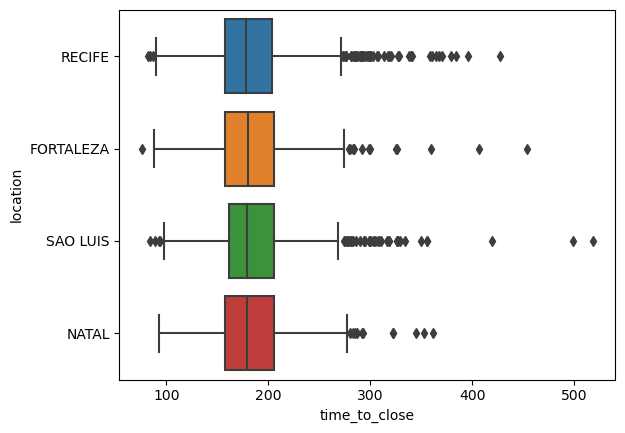

In [28]:
sns.boxplot(data=df, x='time_to_close', y='location')

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam